# Prédiction de fidélisation client 

> Ceci est un exemple de projet de prediction de fidelisation client. j'ai utilise les données "Churn_modeling.csv" que j'ai telecharger sur Kaggle. 

By __Aichatou Boubacar Soumana__

# Les etapes à suivre sont:
1. Importer les biliothéques nécessaires
2. Charger les données
3. Pré-traiter les données
4. Construire le modèle
5. Entraîner le modèle
6. Évaluer le modèle
7. Prédire la fidélisation client

## 1. Importer les bibliothèques nécessaires 

In [147]:
import pandas as pd
import pickle
import seaborn as sns
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score, recall_score,f1_score
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier

## 2. Charger les données

> j'ai commencé par charger les données d'un fichier CSV à l'aide de la bibliothèque Pandas

In [148]:
df = pd.read_csv("churn_modeling.csv")
df

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [149]:
df.isnull().any().any()

False

In [150]:
df = df.set_index('CustomerId')
df

,RowNumber,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
CustomerId,,,,,,,,,,,,,
15634602,1,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
15647311,2,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
15619304,3,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
15701354,4,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
15737888,5,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
15606229,9996,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
15569892,9997,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
15584532,9998,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1


In [151]:
#df.head()
#df.tail()
df.shape
print("Nombre de ligne:", df.shape[0])
print("Nombre de colonne:", df.shape[1])

Nombre de ligne: 10000
Nombre de colonne: 13


In [152]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 15634602 to 15628319
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   Surname          10000 non-null  object 
 2   CreditScore      10000 non-null  int64  
 3   Geography        10000 non-null  object 
 4   Gender           10000 non-null  object 
 5   Age              10000 non-null  int64  
 6   Tenure           10000 non-null  int64  
 7   Balance          10000 non-null  float64
 8   NumOfProducts    10000 non-null  int64  
 9   HasCrCard        10000 non-null  int64  
 10  IsActiveMember   10000 non-null  int64  
 11  EstimatedSalary  10000 non-null  float64
 12  Exited           10000 non-null  int64  
dtypes: float64(2), int64(8), object(3)
memory usage: 1.1+ MB


In [153]:
df=df.replace(to_replace=["Spain", "Germany","France"],
           value=["Niamey", "Maradi", "Tahoua"])
df.head()

,RowNumber,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
CustomerId,,,,,,,,,,,,,
15634602,1,Hargrave,619,Tahoua,Female,42,2,0.00,1,1,1,101348.88,1
15647311,2,Hill,608,Niamey,Female,41,1,83807.86,1,0,1,112542.58,0
15619304,3,Onio,502,Tahoua,Female,42,8,159660.80,3,1,0,113931.57,1
15701354,4,Boni,699,Tahoua,Female,39,1,0.00,2,0,0,93826.63,0
15737888,5,Mitchell,850,Niamey,Female,43,2,125510.82,1,1,1,79084.10,0


## checker les valeurs null du dataset

In [154]:
df.isnull().sum()

RowNumber          0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

## obtenir les statistiques globales de l'ensemble de données

In [155]:
df.describe()

,RowNumber,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


## suppression des éléments non pertinents

In [156]:
df.columns

Index(['RowNumber', 'Surname', 'CreditScore', 'Geography', 'Gender', 'Age',
       'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember',
       'EstimatedSalary', 'Exited'],
      dtype='object')

In [157]:
df = df.drop(['RowNumber', 'Surname'], axis=1)
df

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
CustomerId,,,,,,,,,,,
15634602,619,Tahoua,Female,42,2,0.00,1,1,1,101348.88,1
15647311,608,Niamey,Female,41,1,83807.86,1,0,1,112542.58,0
15619304,502,Tahoua,Female,42,8,159660.80,3,1,0,113931.57,1
15701354,699,Tahoua,Female,39,1,0.00,2,0,0,93826.63,0
15737888,850,Niamey,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...
15606229,771,Tahoua,Male,39,5,0.00,2,1,0,96270.64,0
15569892,516,Tahoua,Male,35,10,57369.61,1,1,1,101699.77,0
15584532,709,Tahoua,Female,36,7,0.00,1,0,1,42085.58,1


## encodage de données catégorielles

> Le codage des données catégorielles est un processus de conversion des données catégorielles en format entier afin que les données avec les valeurs catégorielles converties puissent être fournies aux modèles pour donner et améliorer les prédictions.

In [158]:
df["Geography"].unique()

array(['Tahoua', 'Niamey', 'Maradi'], dtype=object)

In [159]:
df.Geography=df.Geography.map({"Maradi":1,"Niamey":2, "Tahoua":3})

In [160]:
df.Geography.value_counts()

3    5014
1    2509
2    2477
Name: Geography, dtype: int64

In [161]:
df.Gender=df.Gender.map({"Male":1, "Female":0})

In [162]:
df.Gender.value_counts()

1    5457
0    4543
Name: Gender, dtype: int64

In [163]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
CustomerId,,,,,,,,,,,
15634602,619,3,0,42,2,0.00,1,1,1,101348.88,1
15647311,608,2,0,41,1,83807.86,1,0,1,112542.58,0
15619304,502,3,0,42,8,159660.80,3,1,0,113931.57,1
15701354,699,3,0,39,1,0.00,2,0,0,93826.63,0
15737888,850,2,0,43,2,125510.82,1,1,1,79084.10,0


> **value_counts()** : Renvoie une série contenant le nombre de valeurs uniques.

In [164]:
df["Exited"].value_counts()

0    7963
1    2037
Name: Exited, dtype: int64

## les déséquilibres non traites

> ici notre target sera "Exited" or quitté
> **Target(Variable cible)** d'un ensemble de données est la caractéristique de l'ensemble de données qu'on souhaite mieux comprendre.
>> X = variables independants  
>> y = variable cible

In [165]:
X= df.drop("Exited", axis=1)
y = df["Exited"]

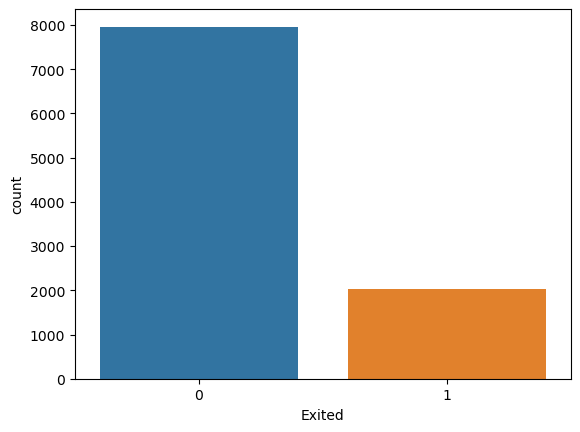

In [166]:
df= sns.countplot(x=df["Exited"],data=df)

## Traitement des données déséquilibrées avec SMOTE

> **La technique de suréchantillonnage synthétique des minorités (SMOTE) est une technique statistique permettant d'augmenter le nombre de cas dans l'ensemble de données de manière équilibrée**

> - d'apres le graphe, les classes sont desequilibres.
> - en Machine Learning, c'est ce qu'on cherche a eviter.
> - Dans les projets de Machine Learning, les modèles fonctionnent bien si les proportions des classes du jeu de données sont équilibrées.

In [235]:
oversample = SMOTE()

In [236]:
#X_eq, y_eq = SMOTE.fit_resample(X, y)
X_eq, y_eq = oversample.fit_resample(X, y)

In [237]:
X_eq.shape, y_eq.shape

((15926, 10), (15926,))

In [238]:
y_eq.value_counts()

1    7963
0    7963
Name: Exited, dtype: int64

## Diviser l'ensemble de données en un ensemble de formation et un ensemble de test

In [239]:
X_train, X_test, y_train, y_test = train_test_split(X_eq, y_eq, test_size=0.2, random_state=42)

## feature scaling

> **feature scaling(mise à l'échelle des caractéristiques):** est une méthode utilisée pour normaliser la gamme des variables indépendantes ou des caractéristiques des données.

In [240]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)
X_train

array([[ 0.99434003, -1.25319594, -0.84579127, ...,  0.77972866,
        -0.77142208, -1.12298075],
       [ 1.09189266,  1.12283149,  1.18232481, ..., -1.28249743,
         1.29630721,  0.74695112],
       [-0.69657224,  1.12283149, -0.84579127, ...,  0.77972866,
         1.29630721,  0.42176296],
       ...,
       [ 0.2030798 ,  1.12283149,  1.18232481, ...,  0.77972866,
        -0.77142208, -0.05358124],
       [-0.3172009 , -0.06518223, -0.84579127, ..., -1.28249743,
        -0.77142208, -0.04589058],
       [ 0.52825524, -1.25319594,  1.18232481, ...,  0.77972866,
         1.29630721, -0.81752966]])

## Logistic Regression

> - La régression logistique est un exemple d'apprentissage supervisé. Elle est utilisée pour calculer ou prédire la probabilité d'un événement binaire (oui/non) 
> - L'apprentissage automatique supervisé est généralement utilisé pour classer les données ou faire des prédictions 
> - l'apprentissage non supervisé est généralement utilisé pour comprendre les relations au sein des ensembles de données.

In [241]:
lr = LogisticRegression()
lr.fit(X_train, y_train)
y_pred1 = lr.predict(X_test)
accuracy_score(y_test, y_pred1)

0.7912743251726303

In [242]:
precision_score(y_test, y_pred1)

0.7744128553770087

## SVC (Support Vector Classifier)

In [243]:
sv = SVC()
sv.fit(X_train, y_train)
y_pred2 = sv.predict(X_test)
accuracy_score(y_test, y_pred2)


0.8449466415568111

In [244]:
precision_score(y_test, y_pred2)

0.8349146110056926

## Kneighbors Classifier

In [245]:
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
y_pred3 = knn.predict(X_test)
accuracy_score(y_test, y_pred3)

0.8295668549905838

In [246]:
precision_score(y_test, y_pred3)

0.8101965601965602

## Decision Tree Classifier

In [247]:
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)
y_pred4 = dt.predict(X_test)
accuracy_score(y_test, y_pred4)

0.7950408035153798

In [248]:
precision_score(y_test, y_pred4)

0.7757352941176471

## Random Forest Classifier

In [249]:
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
y_pred5 = rf.predict(X_test)
accuracy_score(y_test, y_pred5)

0.8615819209039548

In [250]:
precision_score(y_test, y_pred5)

0.8505674653215637

## Gradient Boosting Classifier

In [251]:
gb = GradientBoostingClassifier()
gb.fit(X_train, y_train)
y_pred6 = gb.predict(X_test)
accuracy_score(y_test, y_pred6)

0.8477715003138732

In [252]:
precision_score(y_test, y_pred6)

0.8409961685823755

> Structurè les donnees en ligne et colonne

In [253]:
final_data = pd.DataFrame({"Models": ["LR", "SV","KNN","DT","RF","GB"], "ACC":[accuracy_score(y_test, y_pred1),accuracy_score(y_test, y_pred2),accuracy_score(y_test, y_pred3),accuracy_score(y_test, y_pred4),accuracy_score(y_test, y_pred5),accuracy_score(y_test, y_pred6)]})
final_data

,Models,ACC
0,LR,0.791274
1,SV,0.844947
2,KNN,0.829567
3,DT,0.795041
4,RF,0.861582
5,GB,0.847772


<Axes: xlabel='Models', ylabel='ACC'>

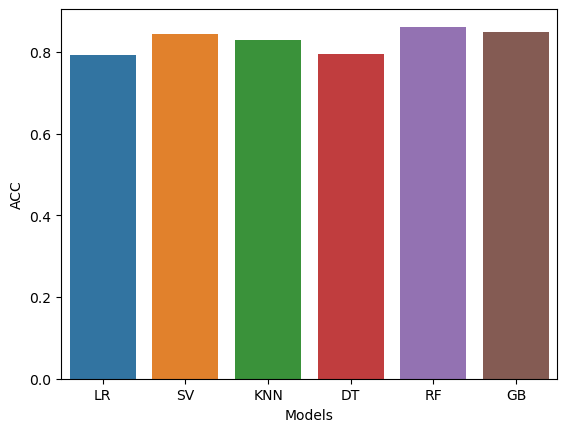

In [254]:
sns.barplot(data=final_data, x=final_data["Models"], y=final_data["ACC"])

## Enregistrer le model

In [255]:
X_eq = sc.fit_transform(X_eq)
rf.fit(X_eq, y_eq)

RandomForestClassifier()

In [256]:
model = pickle.load(open("Ml_model.pkl", "rb"))

In [257]:
model.predict([[345, 4,1, 10000, 2,0,0,20000,2,4]])

array([0])

In [258]:
# pickling the Model
import pickle
file = "Ml_model.pkl"
with open(file, "wb") as f:
    pickle.dump(rf, f)